# Homework 3

@ Author Juanwu Lu

@ CS285 Fall 2022

&copy; UC Berkeley

In [12]:
import os
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
from os import path as osp

plt.style.use('seaborn-paper')
sns.set_style('whitegrid')

In [8]:
# Common Tensorboard result preprocessing
# =========================================
def _process_df(df: pd.DataFrame, name: str = None) -> None:
    assert ('Step' in df.columns) and ('Value' in df.columns)
    df.sort_values(by=['Step'], inplace=True)
    df.rename(
        columns={'Step': 'Time Steps', 'Value': name or 'Value'},
        inplace=True
    )
    if 'Wall time' in df.columns:
        df.drop(labels=['Wall time'], axis=1, inplace=True)


## Part 1: Q-Learning

- <input type="checkbox" checked> Question 1: basic Q-learning performance (DQN)
  - <input type="checkbox" checked> Average per-epoch reward vs. number of time steps
  - <input type="checkbox" checked> Best mean reward vs. number of time steps
- [ ] Question 2: double Q-learning (DDQN)
- [ ] Question 3: experimenting with hyperparameters

,Time Steps,Return Type,Return Value
0,50001,Average per-epoch Return,403.100006
1,150001,Average per-epoch Return,486.100006
2,160001,Average per-epoch Return,529.500000
3,190001,Average per-epoch Return,533.400024
4,270001,Average per-epoch Return,603.000000


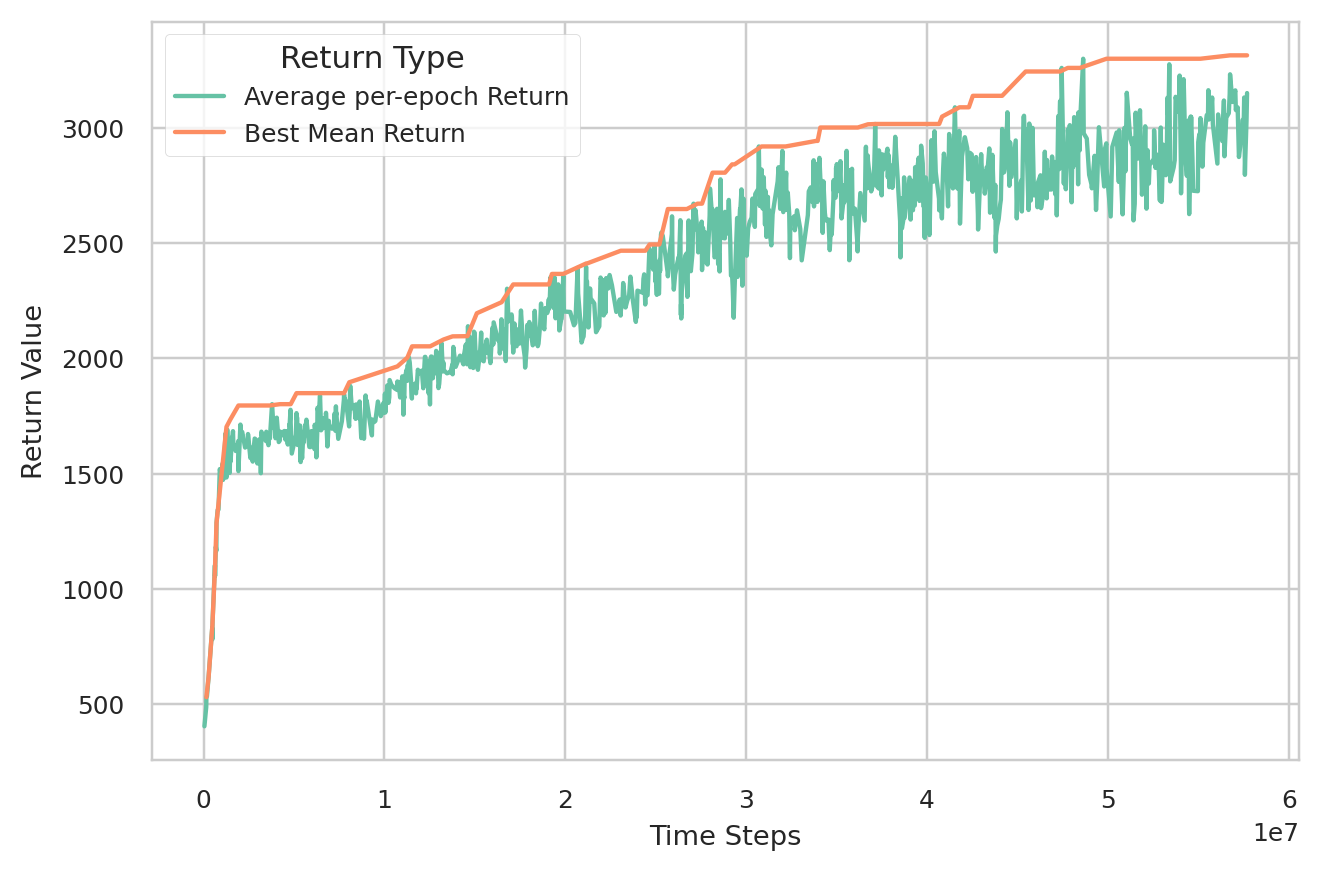

In [26]:
# Question 1: basic Q-learning performance
# =========================================
avg_r_df = pd.read_csv(
    osp.join('./data/hw3/q1',
            'run-q1_MsPacman-v0_03-10-2022_12-21-49-tag-'
            'Train_AverageReturn.csv')
)
_process_df(avg_r_df, name='Average per-epoch Return')
best_r_df = pd.read_csv(
    osp.join('./data/hw3/q1/',
             'run-q1_MsPacman-v0_03-10-2022_12-21-49-tag-'
             'Train_BestReturn.csv')
)
_process_df(best_r_df, name='Best Mean Return')

df = pd.merge(avg_r_df, best_r_df, how='left')
df = df.melt(
    id_vars='Time Steps',
    var_name='Return Type',
    value_name='Return Value'
)
df.dropna(axis=0, how='any', inplace=True)
display(df.head(5))

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Return Value',
    hue='Return Type',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q1.png', dpi=600)

,Time Steps,Average per-epoch Return,Algorithm,Seed
0,10001,-240.375397,Vanilla DQN,1
1,20001,-140.470367,Vanilla DQN,1
2,30001,-43.521908,Vanilla DQN,1
3,40001,4.386968,Vanilla DQN,1
4,50001,-9.712893,Vanilla DQN,1


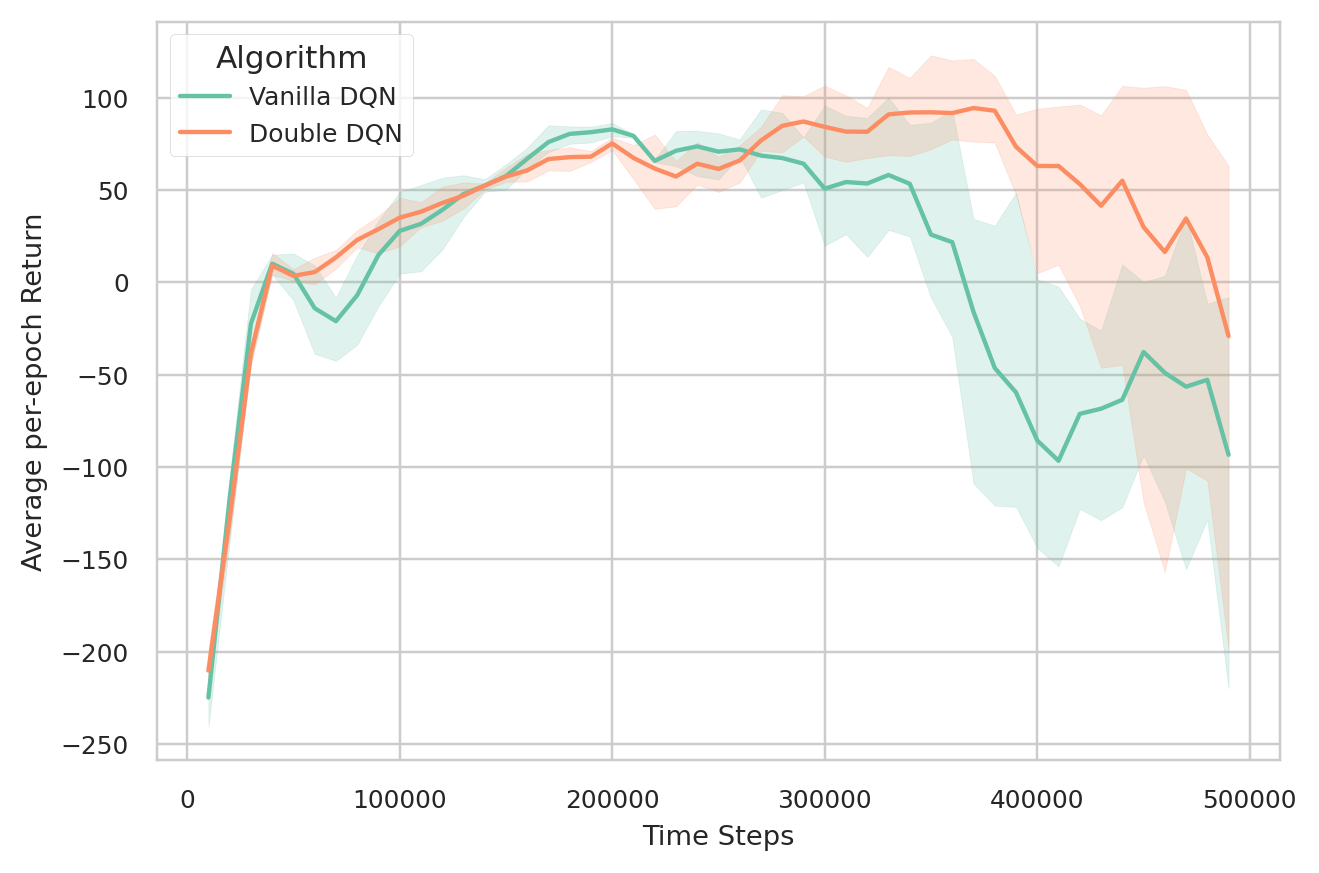

In [38]:
# Question 2: double Q-learning (DDQN)
# =========================================
vanilla_df = pd.DataFrame()
for i, filename in enumerate(os.listdir('./data/hw3/q2/average/vanilla')):
    df = pd.read_csv(
        osp.join('./data/hw3/q2/average/vanilla', filename)
    )
    _process_df(df, name='Average per-epoch Return')
    df['Algorithm'] = 'Vanilla DQN'
    df['Seed'] = i + 1
    vanilla_df = pd.concat([vanilla_df, df], axis=0)

double_df = pd.DataFrame()
for i, filename in enumerate(os.listdir('./data/hw3/q2/average/double')):
    df = pd.read_csv(
        osp.join('./data/hw3/q2/average/double', filename)
    )
    _process_df(df, name='Average per-epoch Return')
    df['Algorithm'] = 'Double DQN'
    df['Seed'] = i + 1
    double_df = pd.concat([double_df, df], axis=0)

df = pd.concat([vanilla_df, double_df], axis=0)
display(df.head(5))

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=224)
ax = sns.lineplot(
    data=df,
    x='Time Steps',
    y='Average per-epoch Return',
    hue='Algorithm',
    palette='Set2',
    ax=ax
)
fig.tight_layout()
fig.savefig('../docs/hw3_report/img/q2.png', dpi=600)
